In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode (connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [83]:
#Lets LOAD the Data
country = pd.read_csv(r'D://DataSets//unemployment_analysis.csv')
country.head(10)

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Avg
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11,7.24
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28,11.14
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84,4.94
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53,5.45
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82,16.32
5,Arab World,ARB,11.62,12.12,12.86,12.95,13.32,12.38,11.95,11.97,...,10.74,10.87,10.97,10.76,10.90,10.50,10.01,11.49,11.63,11.34
6,United Arab Emirates,ARE,1.87,1.84,1.85,1.81,1.80,1.90,1.98,2.14,...,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36,2.35
7,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,...,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90,10.98
8,Armenia,ARM,1.60,1.80,5.30,6.60,6.70,9.30,10.80,9.40,...,16.18,17.50,18.26,17.62,17.70,18.97,18.30,21.21,20.90,12.92
9,Australia,AUS,9.58,10.73,10.87,9.72,8.47,8.51,8.36,7.68,...,5.66,6.08,6.05,5.71,5.59,5.30,5.16,6.46,5.11,6.52


In [42]:
print(country.shape)

(235, 33)


In [84]:
display(country['Country Name'].unique())

array(['Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       

In [85]:
country_list = [country['Country Name'].unique()]
country_list

[array(['Africa Eastern and Southern', 'Afghanistan',
        'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
        'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
        'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
        'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
        'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
        'Botswana', 'Central African Republic', 'Canada',
        'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
        'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
        'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
        'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
        'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
        'East Asia & Pacific (excluding high income)',
        'Early-demographic dividend', 'East Asia & Pa

In [86]:
# Create dataframe for taking average 
df =  pd.DataFrame(country)
avg = df.mean(axis=1)
print(avg)


0       7.244063
1      11.141250
2       4.944063
3       5.452187
4      16.318125
         ...    
230     5.838125
231    11.793438
232    28.232500
233    13.160000
234     5.177500
Length: 235, dtype: float64


In [87]:
#Plotting 1991 visuals
metricscale1=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale1,
        showscale = True,
    
        locations = country['Country Name'].values,
        z = country['1991'].values,
#         z = country['1991''1992'].values,
        locationmode = 'country names',
        text = country['Country Name'].values,
    
#         locations = country_clean['Country Name'].values,
#         z = country_clean['1991'].values,
#         locationmode = 'country names',
#         text = country_clean['Country Name'].values,
    
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Unemployment\nRate')
            )
       ]
layout = dict(
    title = 'World Map of Global Youth Unemployment in the Year 1991',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap1991')

# ************* 2021 *************************************

metricscale1=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale1,
        showscale = True,
    
        locations = country['Country Name'].values,
        z = country['2021'].values,
        locationmode = 'country names',
        text = country['Country Name'].values,
    
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Unemployment\nRate')
            )
       ]
layout = dict(
    title = 'World Map of Global Youth Unemployment in the Year 2021',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2021')



In [88]:
#*********************** Average ****************************

metricscale1=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = metricscale1,
        showscale = True,
    
        locations = country['Country Name'].values,
        z = country['Avg'].values,
        locationmode = 'country names',
        text = country['Country Name'].values,
    
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Unemployment\nRate')
            )
       ]
layout = dict(
    title = 'World Map of Global Youth Unemployment in the last 30 Year (Average)',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmapLast30Year')

# SCATTER PLOTS OF UNEMPLOYMENT RATES

Let's now delve deeper into the data by plotting average unemployment rates in scatter plot.

In [90]:
# Scatter plot of 2010 unemployment rates
trace = go.Scatter(
    y = country['Avg'].values,
    mode='markers',
    marker=dict(
        size= country['Avg'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = country['Avg'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = country['Country Name'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of unemployment (average) rates for last 30 years',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Unemployment Rate',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterAverage')

By looking at the above scatter plot, we can see that the countries like Lesotho, North Macedonia, South Africa, Djibouti, Eswatini, Bosnia and Herzegovina, Montenegro, Namibia, Cango Rep, Botswana are top 10 countries which treanding high for last 30 years.
You can hover over on the graph to view country names.

# Net Movement of Unemployment Rate over the 30 years

Let's now plot a Seaborn heatmap to visualise how the unemployment rates change over the years. The heatmap is sorted such that countries with the largest increases in unemployment are towards the top half of the plot while countries with the highest decreases in unemployment are found towards the bottom half.

In [91]:
# I first create an array containing the net movement in the unemployment rate.
diff = country['2021'].values - country['1994'].values

In [93]:
x, y = (list(x) for x in zip(*sorted(zip(diff, country['Country Name'].values), 
                                                            reverse = True)))

# Now I want to extract out the top 15 and bottom 15 countries 
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

Text(0.5, 1.0, 'Movement in Unemployment rate ( Warmer: Higher rate, Cooler: Lower rate )')

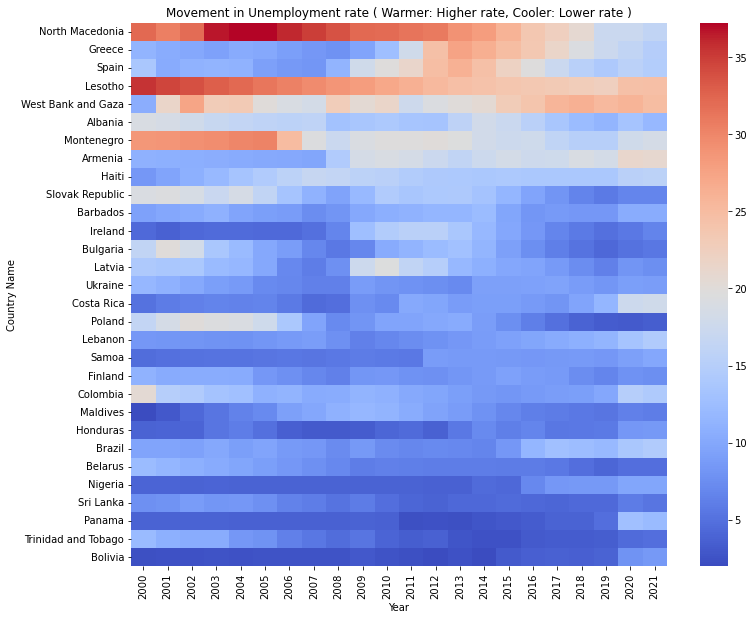

In [94]:
# Resize our dataframe first
keys = [c for c in country if c.startswith('20')]
country_resize = pd.melt(country, id_vars='Country Name', value_vars=keys, value_name='key')
country_resize['Year'] = country_resize['variable']

# Use boolean filtering to extract only our top 15 and bottom 15 moving countries
mask = country_resize['Country Name'].isin(Y)
country_final = country_resize[mask]

# Finally plot the seaborn heatmap
plt.figure(figsize=(12,10))
country_pivot = country_final.pivot("Country Name","Year",  "key")
country_pivot = country_pivot.sort_values('2014', ascending=False)
ax = sns.heatmap(country_pivot, cmap='coolwarm', annot=False, linewidths=0, linecolor='white')
plt.title('Movement in Unemployment rate ( Warmer: Higher rate, Cooler: Lower rate )')

# BARPLOT OF CHANGE IN UNEMPLOYMENT RATE FOR TOP 15 & BOTTOM 15 COUNTRIES

And here we plot a Seaborn barplot to visualise the data in a different manner. The nice thing about seaborn barplots being that with any negative values ( the negative values being countries with unemployment rate decrease), it automatically plots the charts in the reverse x-axis order therefore making for intuitive visuals.

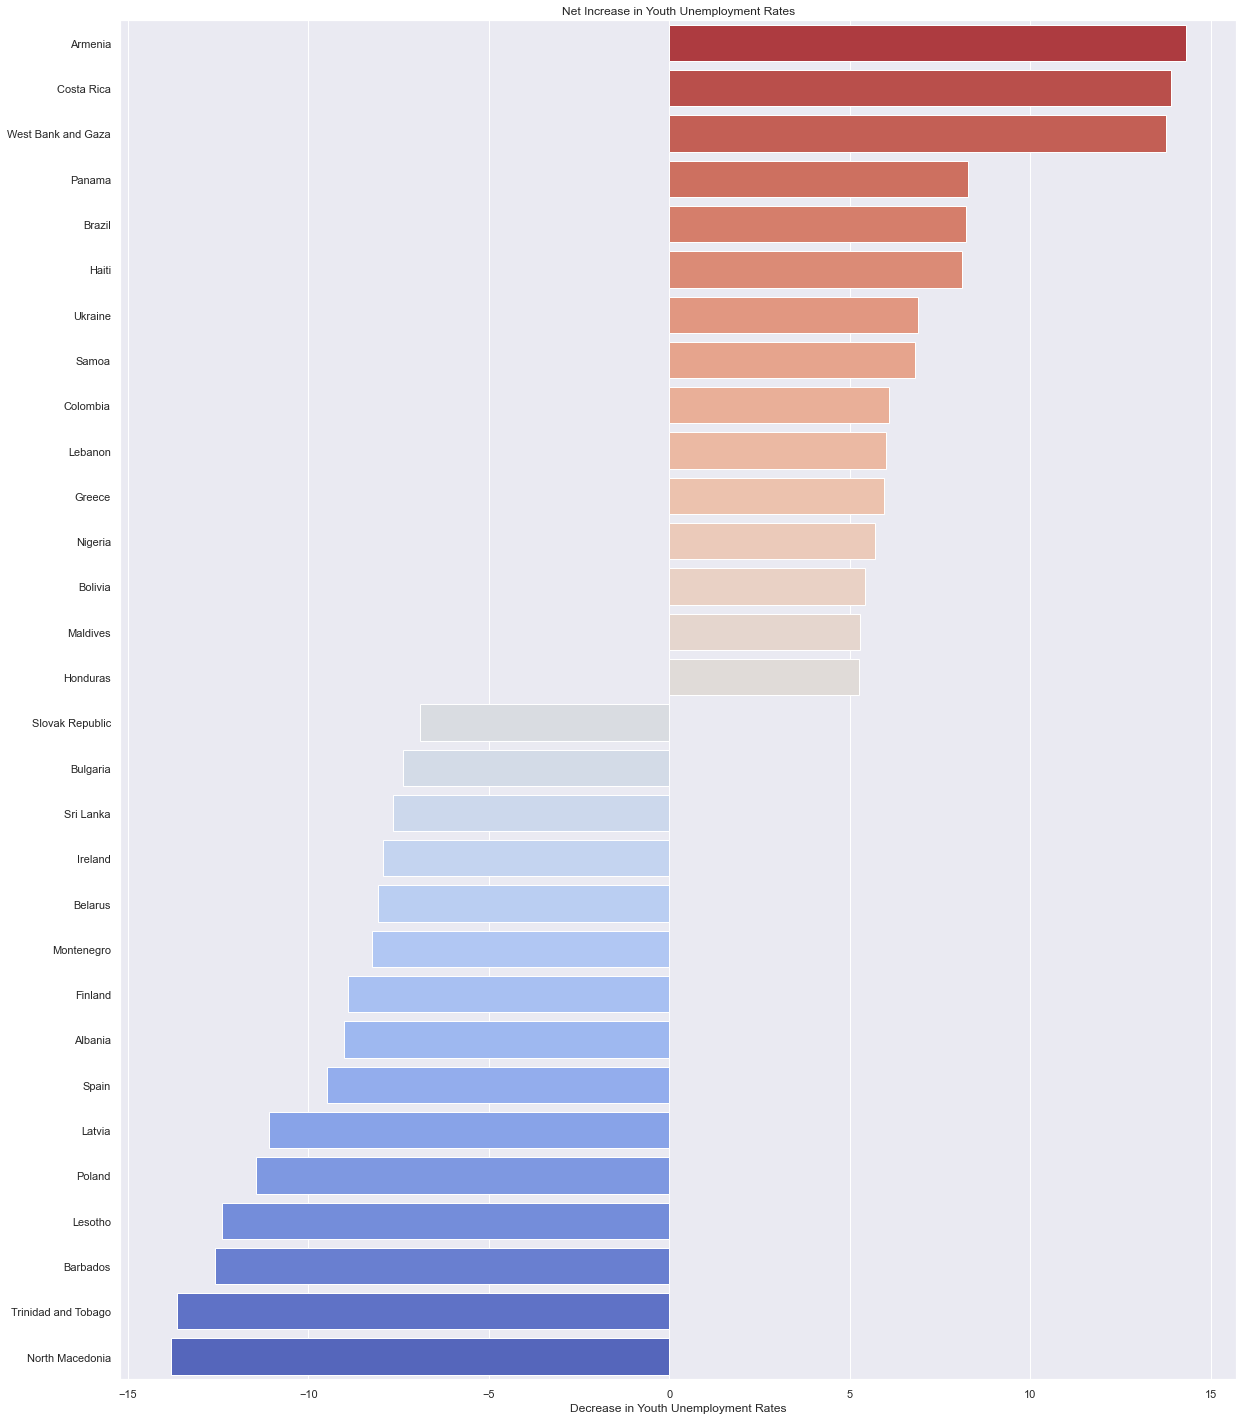

In [95]:
# Plot using Seaborn's barplot
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(20, 25))
colors_cw = sns.color_palette('coolwarm', len(X))
sns.barplot(X, Y, palette = colors_cw[::-1])
Text = ax.set(xlabel='Decrease in Youth Unemployment Rates', 
              title='Net Increase in Youth Unemployment Rates')

# BARPLOT OF CHANGE IN UNEMPLOYMENT RATE FOR ALL COUNTRIES

Finally let's look at the barplot charts for youth unemployment rate changes in ALL countries present in the dataset.

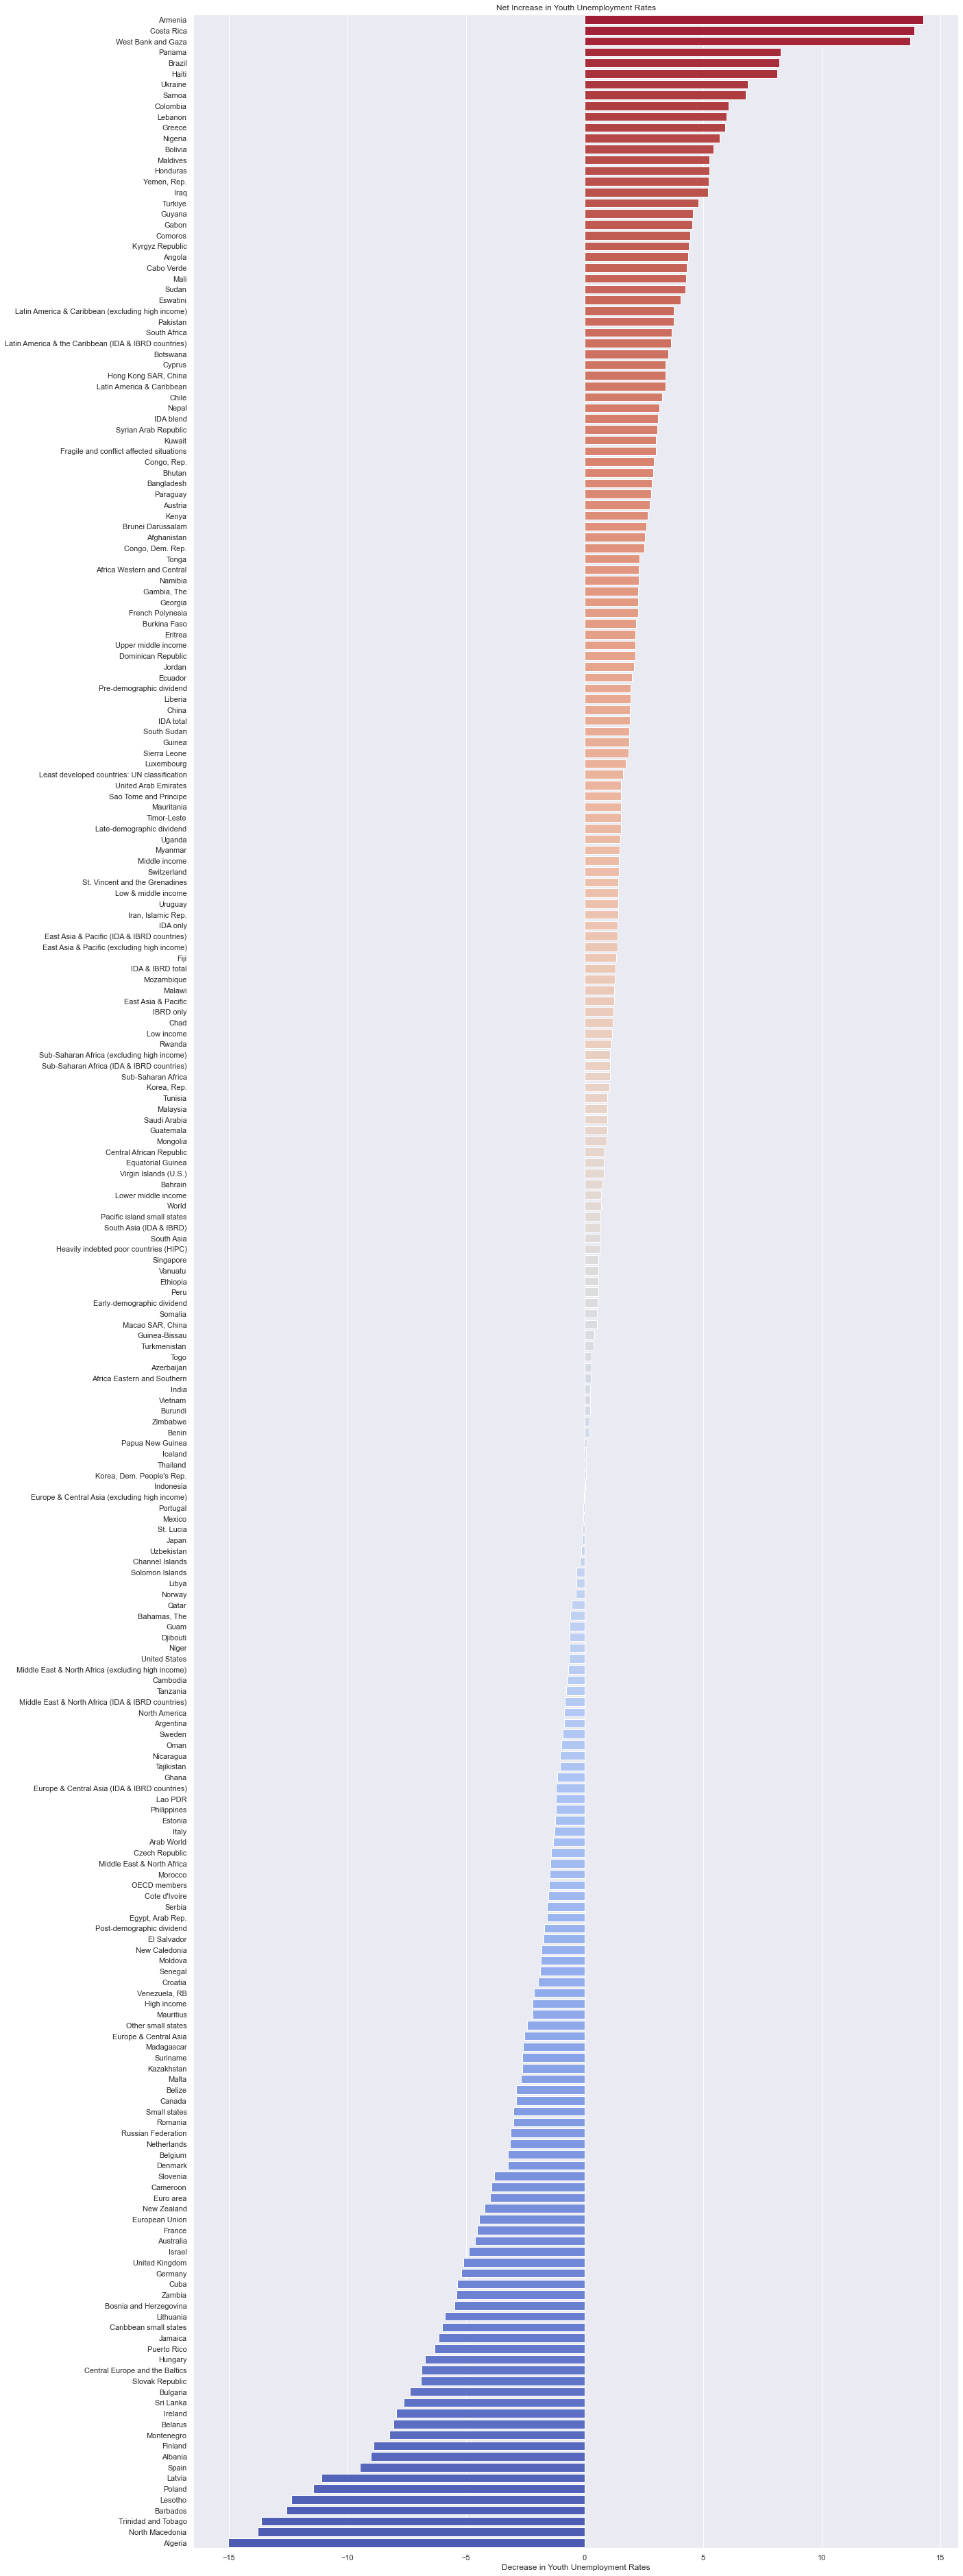

In [96]:
# Plot using Seaborn's barplot
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(20, 68))
colors_cw = sns.color_palette('coolwarm', len(x))
sns.barplot(x, y, palette = colors_cw[::-1])
Text = ax.set(xlabel='Decrease in Youth Unemployment Rates', 
              title='Net Increase in Youth Unemployment Rates')